# Red Neuronal Multicapa con TensorFlow
Se cuenta con la antiguedad y el precio de los varios carrios, estos estan clasificados por carro normal (tipo = 0) y por carro clasico (tipo = 1)

# Leer los datos (carros.csv) con Pandas

In [12]:
import pandas as pd 
data = pd.read_csv('Datasets/carros.csv')
data

,antiguedad,precio,tipo
0,0.0,1.0,0
1,0.1,1.0,0
2,0.2,1.0,0
3,0.3,1.0,0
4,0.4,1.0,0
...,...,...,...
116,0.6,0.0,1
117,0.7,0.0,1
118,0.8,0.0,1
119,0.9,0.0,1


In [13]:
X = data.iloc[:, :-1]
X

,antiguedad,precio
0,0.0,1.0
1,0.1,1.0
2,0.2,1.0
3,0.3,1.0
4,0.4,1.0
...,...,...
116,0.6,0.0
117,0.7,0.0
118,0.8,0.0
119,0.9,0.0


In [14]:
y = data.iloc[:, -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
116    1
117    1
118    1
119    1
120    1
Name: tipo, Length: 121, dtype: int64

# Mostrar los datos en gráfico

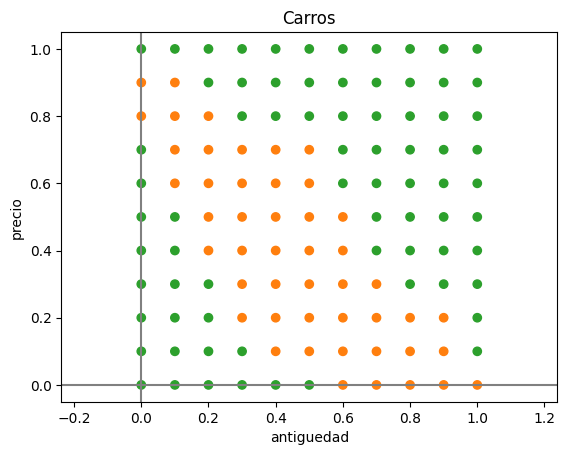

In [15]:
import matplotlib.pyplot as plt

colors = [ 'C1' if i == 1 else 'C2' for i in y ]
plt.title('Carros')
plt.axhline(color = 'gray')
plt.axvline(color = 'gray')
plt.xlabel('antiguedad')
plt.ylabel('precio')
plt.axis('equal')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = colors) 

# Crear una red neuronal con TensorFlow

In [16]:
from tensorflow import keras
from keras.layers import Dense

model = keras.Sequential([
    Dense(128, activation='relu', input_shape=[2]),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

c:\Users\juanp\Programacion\Redes-Neuronales-Notebook\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,217 (98.50 KB)

 Trainable params: 25,217 (98.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
import tensorflow as tf

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2, )),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,217 (98.50 KB)

 Trainable params: 25,217 (98.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
model.fit(X, y, epochs=1000, batch_size=60)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5041 - loss: 0.4987
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6033 - loss: 0.4905
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6033 - loss: 0.4854
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6033 - loss: 0.4773 
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6033 - loss: 0.4689
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6033 - loss: 0.4608
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6033 - loss: 0.4533
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6033 - loss: 0.4490
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6033 - loss: 0.4445
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6033 - loss: 0.4380
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6033 - loss: 0.4301
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy:

# Visualizar el comportamiento 

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


C:\Users\juanp\AppData\Local\Temp\ipykernel_23620\1772355987.py:19: UserWarning: The following kwargs were not used by contour: 'lavels'
  plt.contourf(xx, yy, z, lavels=1, colors=['C2', 'C1'], alpha=0.3)


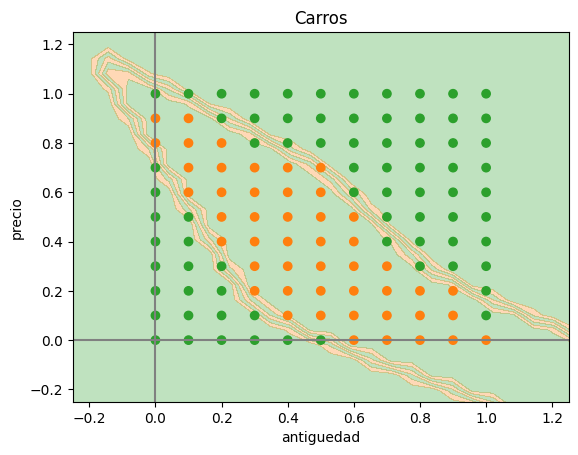

In [20]:
import numpy as np

xx, yy = np.meshgrid(np.linspace(-1, 2, 50), np.linspace(-1, 2, 50))
mesh = np.c_[xx.ravel(), yy.ravel()]

z = []
for j in range(50):
    for k in range(50):
        z.append((xx[j, k], yy[j, k]))
z = model.predict(np.array(z)).reshape(xx.shape)

plt.title('Carros')
plt.axhline(color = 'gray')
plt.axvline(color = 'gray')
plt.xlim([-0.25, 1.25])
plt.ylim([-0.25, 1.25])
plt.xlabel('antiguedad')
plt.ylabel('precio')
plt.contourf(xx, yy, z, lavels=1, colors=['C2', 'C1'], alpha=0.3)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = colors)